# Decision Tree: Root Node, Leaf Node, Entropy & Information Gain


Der Decision Tree ist eine Methode, die Entropy(Randomness) und Information Gain(Measure of Decrease in Entropy) bei der Klassifizierung in Betracht zieht. Sie braucht wenig Data-Preparation(Scaling/Datatype/Ausreißer sind nicht schwerwiegend). Er neigt aber zum overfitting, kann unstable sein und einen low bias haben(New data problems). DT kann zwei Arten von Aufgaben erfüllen:

1. Als ein Klassifikationsalgorithmus bei Kategorischen Einteilungen. Dabei gilt es, If/Elif/Else-Conditions zu beantworten, um eine Einteilung in Multi-Klassen vorzunehmen, die durch mehrere Siebe (Unterklassen) geht. Die Root der Decision geht dabei durch Branches(Abzweigungen).


2. Als ein Regressionsalgorithmus, wenn die Zielvariable Continous oder Numerisch ist. Das Modell wird auf die unabhängigen Zielvariablen trainiert. Jede Branch/Abzweigung wird auf Basis der Summe der Quadrierten Fehler unternommen.

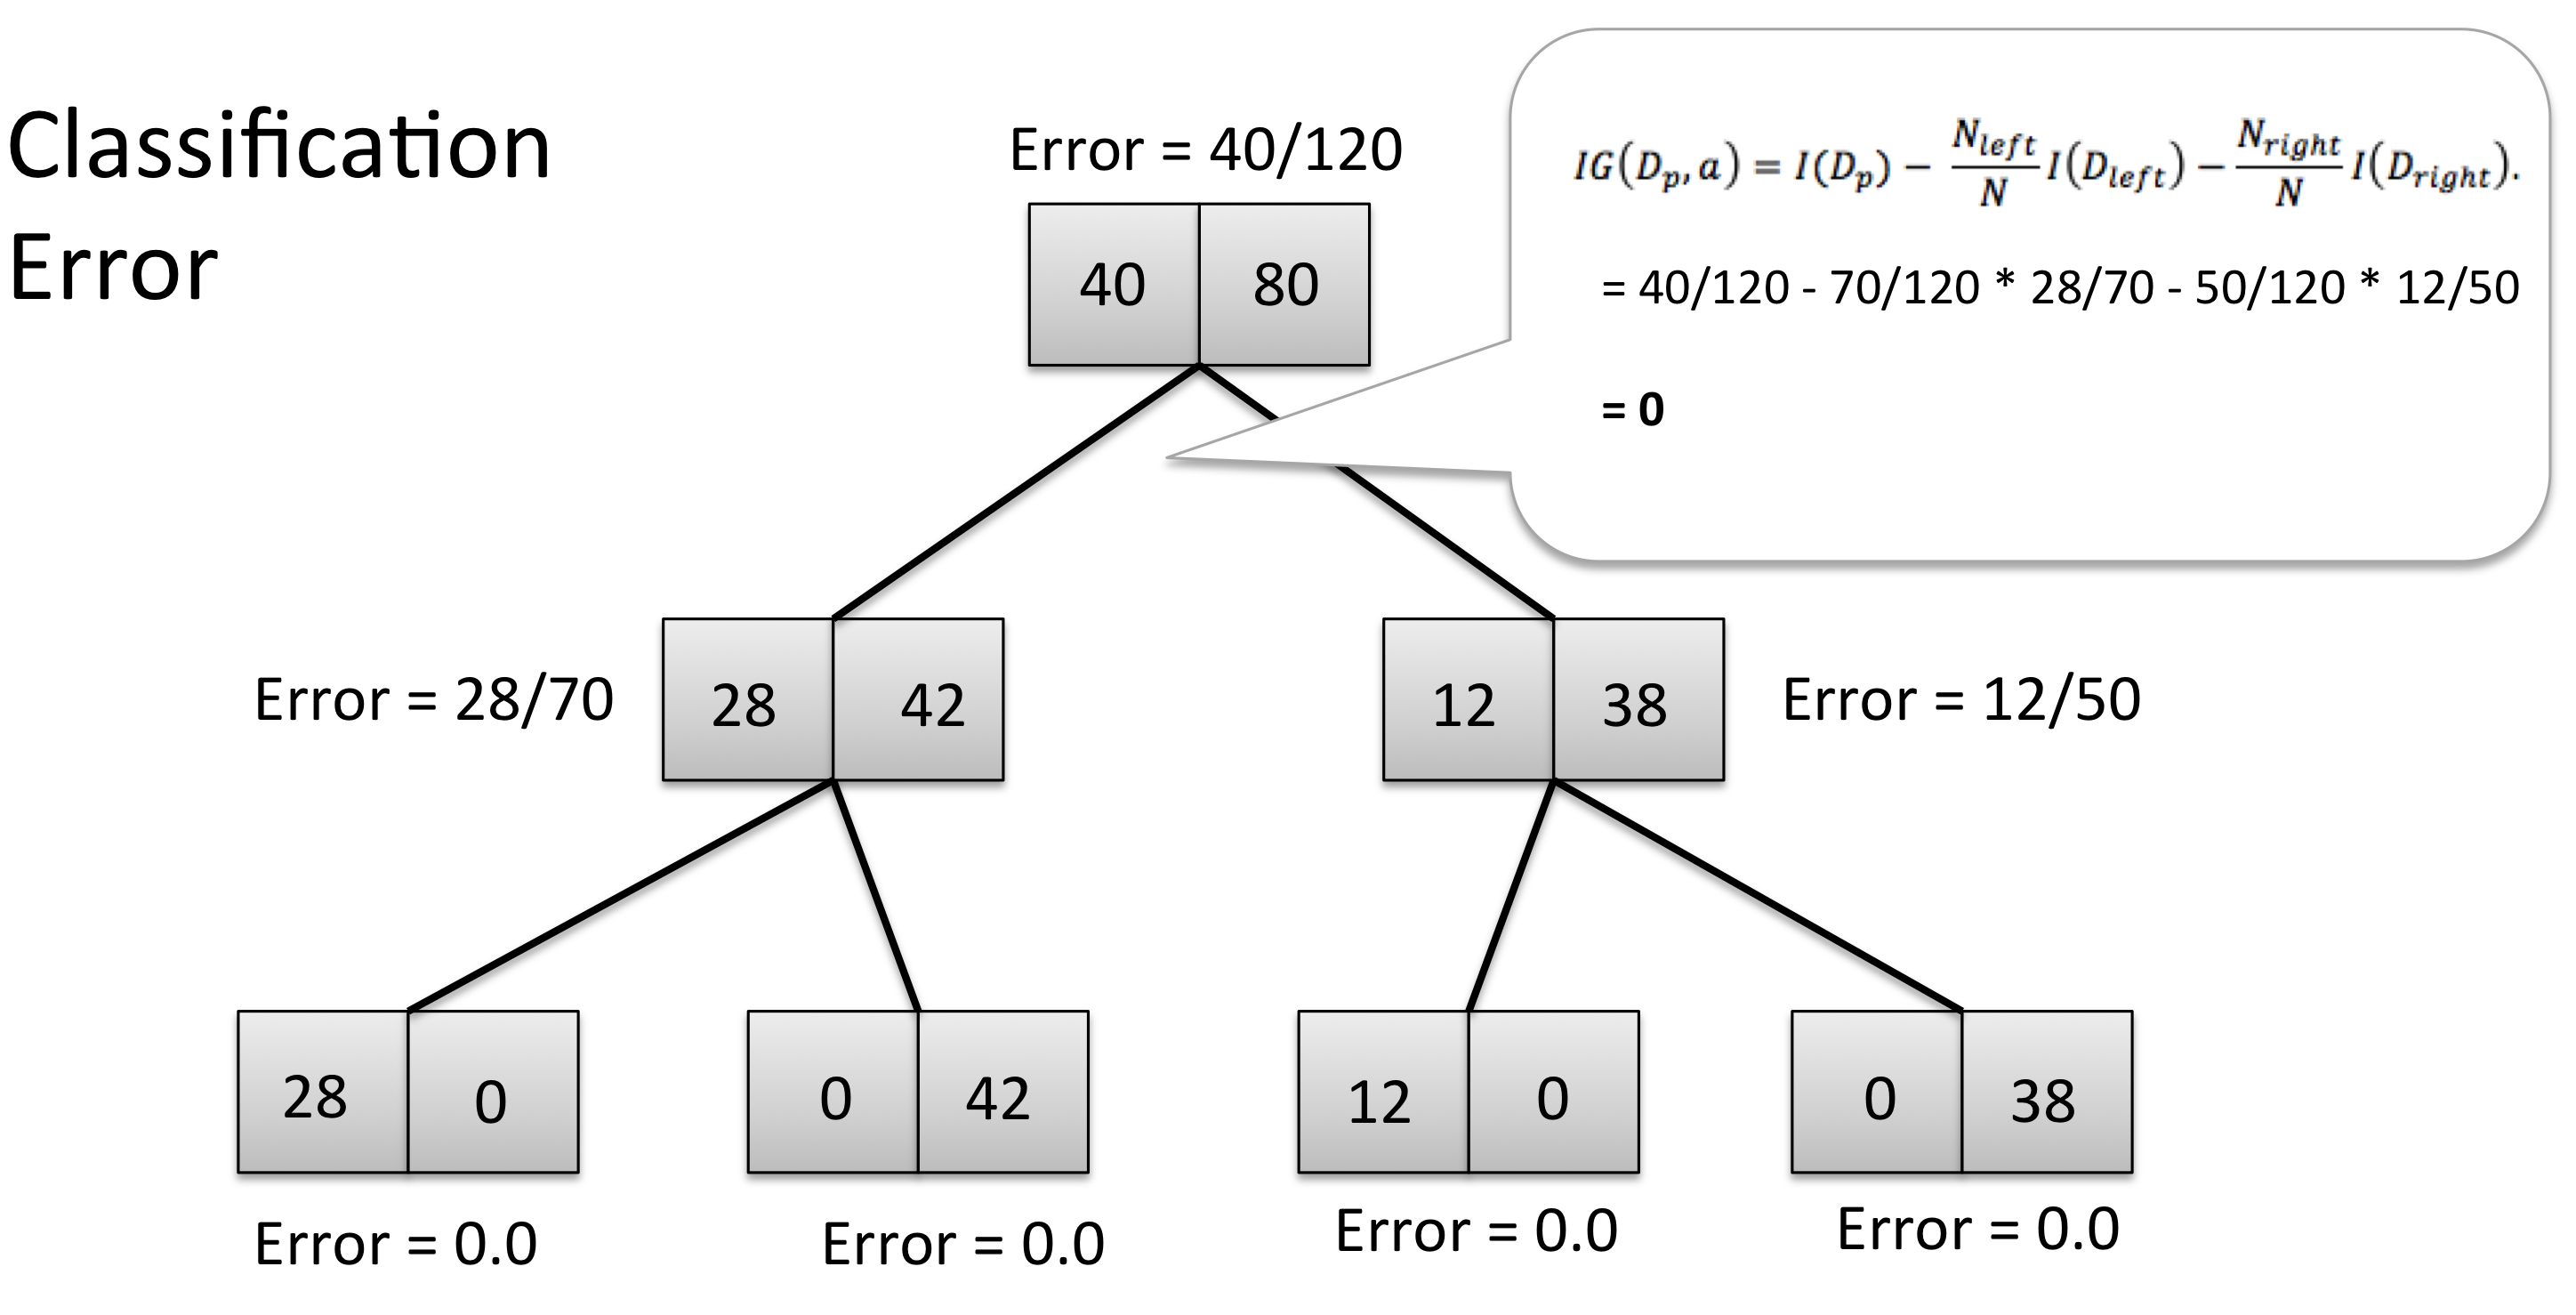

In [1]:
from IPython.display import Image
Image("./dt.png")

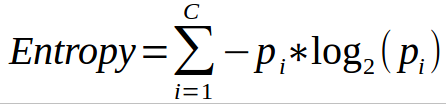

In [4]:
Image("./entropy-formula.png") 
# 1 - (die summe der wahrscheinlichkeiten, eine bestimmte sache pro node zu ziehen *log )

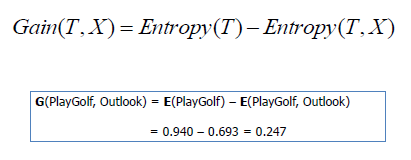

In [2]:
Image("./entropy_gain.png")
# Information gain = die entropy eines parent nodes minus die entropy des nachbar parent nodes

Die Root Node wird die Daten so splitten, das der höchstmögliche Information Gain entsteht. Das wird fortgesetzt, bis in jedem Leaf Node nur noch eine Klasse zu finden ist (bzw. die Accuracy auf 100% ist) 

# Beispiel: Loan Repayment

In [8]:
#import packages, sklearn tree functions, noch keine visualisierung
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [9]:
balance = pd.read_csv('./data/loan_data.csv')
balance.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
balance.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
#rows, columns
balance.shape

(9578, 14)

In [38]:
#X/Y(goal) aufteilen
X = balance.values[:, 2:9]
Y = balance.values[:, 0]
#Y ist type object und muss in int umgewandelt werden, damit es im training erkannt wird
Y = Y.astype('int')

#Test und Trainingsdaten aufteilen:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
#training mit entropy initiieren, 3 parent nodes und 5 leaf nodes
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth =3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=0)

In [39]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
accuracy_score(y_test, y_pred)*100

88.13500347947112

# Visualisierung

In [42]:
from matplotlib import pyplot as plt

In [43]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_4 <= 659.50
|   |--- feature_4 <= 634.50
|   |   |--- class: 0
|   |--- feature_4 >  634.50
|   |   |--- class: 0
|--- feature_4 >  659.50
|   |--- feature_5 <= 1109.98
|   |   |--- class: 0
|   |--- feature_5 >  1109.98
|   |   |--- feature_6 <= 101578.00
|   |   |   |--- class: 1
|   |   |--- feature_6 >  101578.00
|   |   |   |--- class: 0



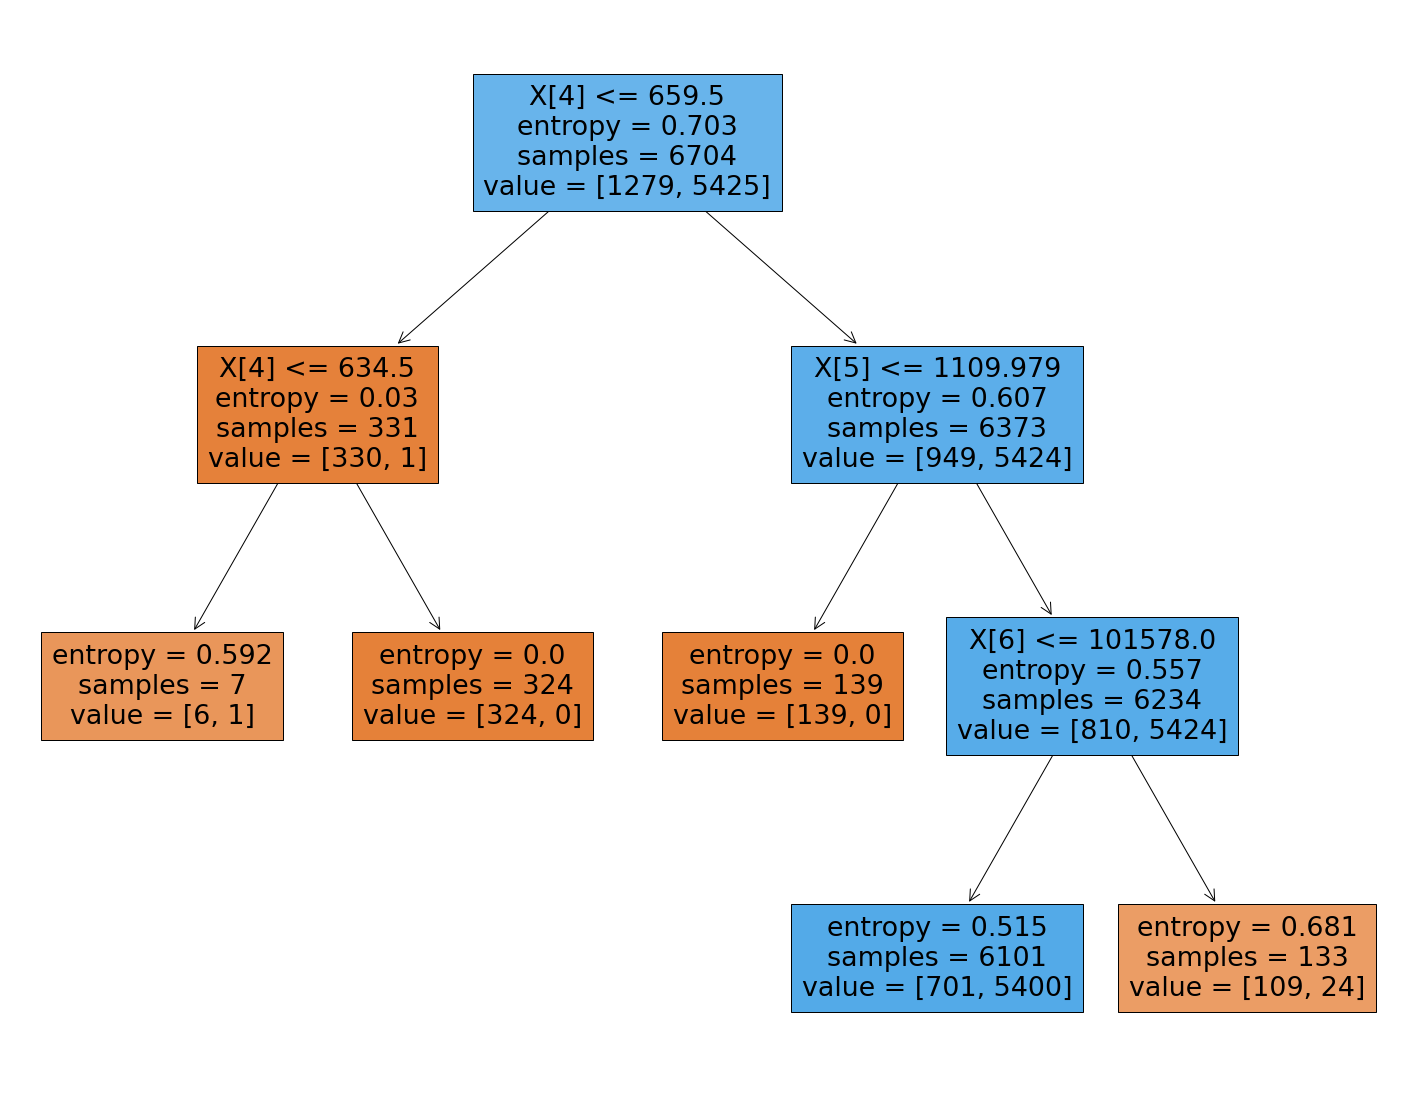

In [47]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy, 
                   filled=True)

In [ ]:
#speichern:
fig.savefig("decicion_tree.png")